# Investitionsrechnung mit Jupyter Notebooks

Das Modul **Investition & Finanzierung** (I&F) ist ein typisches Pflichtmodul im Studium der Betriebswirtschaftlehre. Die derzeit vorherrschende Lehrform erfolgt via *Frontalunterricht* (ggf. ergänzt durch Excelbespiele) und *Tutorien* zur Übung und Vertiefung des Stoffes. 

Im Folgenden soll veranschaulicht werden, wie mit Hilfe von [**Jupyter Notebooks**](http://jupyter.org/) ein Modul "I&F" in der Lehre ergänzt werden kann. 

Jupyter Notebooks sind **WebApps** die lokal ausgeführt werden (d.h. diese laufen auf dem eigenen Computer und sind nicht notwendigerweise im Web öffentlich verfügbar) und sowohl **Textelemente**, als auch **Programm-Code** darstellen können. Zusätzlich können im Text Bilder, Links und Videos eingefügt werden 
(ein [Beispiel](https://nbviewer.jupyter.org/url/jakevdp.github.com/downloads/notebooks/XKCD_plots.ipynb)). In Summe sind Jupyter Notebooks somit insbesondere **interaktive Umgebungen**, die derzeit z.B. im Bereich *Research* und *Datenanalyse* genutzt werden. 

Ein solches Notebook eignet sich deshalb sehr gut, da 
- Formeln einfach dargestellt werden können
- Formeln durch Ausführung von Programmcodes direkt ausgeführt werden können

Studierende erhalten somit die Möglichkeit in einem Dokument geführt zu lernen und erlerntes direkt auszuprobieren. Ergänzt man ein solches Notebook mit zusätzlichen hilfreichen Links zu Themen (oder vorgelagerten Kapiteln), kann die Lehre mit Jupyter Notebooks im Bereich BWL somit zwei wichtige Funktionen erfüllen:

- Ermöglichen von **Flipped Learning**
- Intuitive Heranführung an das **Programmieren** (ohne notwendige Installationen von Software etc.)

Viel Spaß beim Ausprobieren! 

**HINWEIS: Alle Zellen können mit "Shift+ENTER" ausgeführt werden**

## A | Annuitätenrechnung

### Was ist eine Annuität?

"In den Wirtschaftswissenschaften bzw. der Finanzmathematik bezeichnet man als Annuität (lat. annus = Jahr) eine regelmäßig jährlich fließende Zahlung, die sich aus den Elementen Zins und Tilgung zusammensetzt. Man unterscheidet die konstante und die variable Annuität. Während der Laufzeit eines Annuitätendarlehens verändert sich mit fortschreitender Tilgung der Darlehensvaluta das Verhältnis von Zinsanteil zu Tilgungsanteil der hier konstanten Annuität, weshalb man bei Annuitätendarlehen auch von „anfänglicher Tilgung“ spricht. Bei einem Annuitätendarlehen wird daher die (zunehmende) Tilgungs- und die (abnehmende) Zinszahlung so errechnet, dass die regelmäßige Gesamtbelastung gleich bleibt, d. h. annuitätisch ist. Bei einem Abzahlungsdarlehen bleibt dagegen der Tilgungsbetrag bei jeder Zahlung unverändert, so dass die in diesem Fall variable Annuität durch die geringer werdende Zinslast sinkt.

In der Investitionsrechnung wird mit der Annuitätenmethode der Kapitalwert einer Investition auf die Projektdauer verteilt. Dadurch wird der Tatsache Rechnung getragen, dass ein innerhalb kürzerer Dauer erwirtschafteter Kapitalwert im Vergleich höher zu werten ist, da diese Investition möglicherweise wiederholt werden kann (Investitionskette)."  

**Quelle: https://de.wikipedia.org/wiki/Annuit%C3%A4t_(Investitionsrechnung)**



### Der Barwert einer Annuität

Auf einem Zeitstrahl kann man die Annuität wunderbar abbilden, um so eine gewisse Intuition zu entwickeln.


<center>![Test](/Assets/Timeline_A.png)</center>

Aus dem Kapitel ["Der Kapitalbarwert" (Kapitel 1)](NPV.ipynb) wissen wir bereits, wie die im Zeistrahl angegebenen Cashflows bewertet werden müssen. Diskontiert man die angegebenen, jährlichen Zahlungen $C$ mit einem Zinssatz $i$, so erhält man den **Barwert der Annuität**.

$$ PV_{Annuität} = \sum_{n=1}^{N} \frac{C}{(1+i)^n} \tag{A.1}$$

Zur Berechnung einer N-periodigen Annuität müssen demnach N Cashflows diskontiert und addiert werden. 

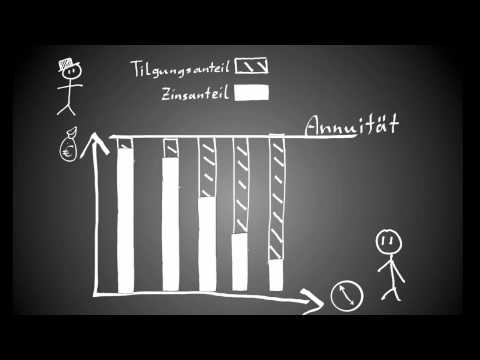

In [1]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('xyELvSvBSQU')

**Beispiel: (naive) Berechnung in Python**  
(Hinweis: Annahmen können verändert werden. Code-Block wird mit "Shift+ENTER" ausgeführt)

In [25]:
# Hinweis: die Notation for "hoch X" ist nicht wie z.B. in Excel "^X", sondern "**X".

C = 30
i = 0.03
N = 10

C/(1.03)**1 + C/(1.03)**2 + C/(1.03)**3 + C/1.03**4 + C/1.03**5 + C/1.03**6 + C/1.03**7 + C/1.03**8 + C/1.03**9 + C/1.03**10

255.90608510327485

### Die Abkürzung: Formel zu Berechnung einer Annuität

Glücklicherweise gibt es eine Art Abkürzung zur Berechnung des Barwertes einer Annuität. Diese Formel kann immer dann genutzt werden, wenn wir mit einem konstanten Zinssatz $i$ rechnen.

$$PV = \frac{C}{i} \times \bigg(1-\frac{1}{(1+i)^N} \bigg) \tag{A.2}$$

> **Intuition für Abkürzungsformel**
> Stellen wir würden ein Wertpapier erfinden wollen, welches uns für 10 Jahre jährlich einen konstanten Betrag auszahlt. Dieses Wertpapier könnten wir z.B. wiefolgt erzeugen  
(Annahme: risikofreier Zins konstant bei 3%):  
> 1. wir zahlen 1.000 EUR auf unser Bankkonto ein
> 2. nach dem ersten Jahr liegen auf unserem Bankkonto 1.030 EUR (1.000 x 1.03). Wir entnehmen die 30 EUR und belassen die 1.000 EUR auf dem Konto
> 3. nach dem zweiten Jahr liegen auf unserem Bankkonto 1.030 EUR (1.000 x 1.03). Wir entnehmen wieder die 30 EUR und belassen die 1.000 EUR auf dem Konto
> 4. wir gehen die nächsten 8 Jahre analog vor
> 5. nach 10 Jahren heben wir die 1.000 EUR wieder von unserem Konto ab
> 
> Intuitiv wird klar, dass die **heutigen 1.000 EUR** der Summe aus (i) dem **Barwert der 30 EUR Abhebungen** und (ii) dem **Barwert der in 10 Jahren abzuhebenden 1.000 EUR** sind. 
>
> Es gilt also: $\text{1.000 EUR} = PV(\text{von 10 jährlichen Zahlungen von 30 EUR}) + PV(\text{der 1.000 EUR in 10 Jahren}) $
>
> Allgemeiner kann man also sagen:  
seien $P$ der ursprüngliche Anlagebetrag, $N$ der Anlagezeitraum, $C$ die jährlichen Zahlungen und $i$ der Zins: $ P = PV(\text{C,i}) + PV(\text{P,i})$
>
>$$ 
\begin{equation}
\begin{split}
PV(\text{C,i}) & = P - PV(\text{P,i}) \\ 
& = P - \frac{P}{(1+i)^N} \\ 
& = P \times \bigg(1 - \frac{1}{(1+i)^N} \bigg) \\ 
& = \frac{C}{i} \times \bigg(1 - \frac{1}{(1+i)^N} \bigg)
\end{split}
\end{equation}
$$
> 
> Hinweis: $P = \frac{C}{i}$ wurde bereits in [Kapitel 2 - ewige Rente](NPV.ipynb) hergeleitet.

**Beispiel: Berechnung in Python**


In [21]:
C/i * (1- 1/(1+i)**N)

255.90608510327507

### Anwendungsfall: Annuität

Ein typischer Anwendungsfall für die Annuitätenrechnung ist ein Annuitätendarlehen. Möchte man z.B. einen Immobilienkredit für den Kauf eines Hauses bei einer Bank aufnehmen, so wird einem typischerweise ein Annuitätendarlehen gewährt.

### Optional: weiterführende Berechnung mit Python

**Berechnung in Python als Funktion**  
Die hergeleitete Annuitätenformel kann in Python dann als Funktion definiert werden. 

In [26]:
# Definition der Funktion "Berechne Barwert einer Annuität"
def pv_annuität(C,i,N):
    return C/i * (1- 1/(1+i)**N)

In [29]:
C = 30
i = 0.03
N = 10
pv_annuität(C,i,N)

255.90608510327507

In [30]:
C = 1000
i = 0.05
N = 55
pv_annuität(C,i,N)

18633.47196207137

** Formel A.1 kann auch einfacher dargestellt werden**

**Variante A:** via For-Schleife

In [36]:
C = 30
i = 0.03
jahre = range(1,11) #Hinweis: erstellt eine Liste mit den Zahlen 1 bis 10
pv = 0
for jahr in jahre:
    pv += C/(1+i)**jahr
pv

255.90608510327485

**Variante B:** via Vektorisierung  
Hinweis: hier muss zunächst eine Bibliothek importiert werden, die für Vektor und Matrixberechnungen genutzt werden kann

In [35]:
import numpy as np #Importieren der Bibliothek

In [53]:
C = np.repeat(30,10)
i = 0.03
jahre = np.arange(1,11) 
df = (1/(1+i)**jahre)
C.dot(df)

255.90608510327485

**Variante C:** via eigenem Modul

In [60]:
from Vorlesung_IF import pv_annuität

pv_annuität??

Signature: pv_annuität(C, i, N)
Source:   
def pv_annuität(C,i,N):
    '''
    Funktion zur Berechnung des Barwertes einer Annuität.
    
    Benötigter Input:
    
    C = jährliche Zahlungen
    
    i = Zinssatz
    
    N = Anzahl an Zahlungen
    
    Output:
    
    Barwert der Annuität berechnet nach:
    
    PV = C/i * (1 - 1/(1+i)**N)
    
    '''
    return C/i * (1 - 1/(1+i)**N)
File:      d:\benutzer\fzeidler\dropbox\02_fh\02 schreiben\konzept - datenkompetenz bwler\example - lecture\vorlesung_if.py
Type:      function


In [61]:
C = 30
i = 0.03
N = 10
pv_annuität(C,i,N)

255.90608510327507